# Basic Usage

In [1]:
import numpy as np
import pandas as pd
from gryffin import Gryffin

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set(context='talk', style='ticks')

First we create a simple one-dimensional objective function

In [2]:
def objective(x):
    
    def sigmoid(x, l, k, x0):
        return l / (1 + np.exp(-k*(x-x0)))

    sigs = [sigmoid(x, -1, 40, 0.2),
            sigmoid(x,  1, 40, 0.4),
            sigmoid(x,  -0.7, 50, 0.6),
            sigmoid(x, 0.7, 50, 0.9)
           ]

    return np.sum(sigs, axis=0) + 1


def merit_function(param):
    """Function that computes the objective one set of parameters from Gryffin.
    """
    x = param['x']
    param['obj'] = objective(x)
    return param

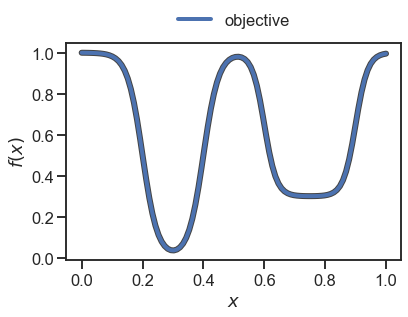

In [3]:
x = np.linspace(0, 1, 100)
_ = plt.plot(x, objective(x), linewidth=6, color='#444444')
_ = plt.plot(x, objective(x), linewidth=4, label='objective')
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5 ,1.), frameon=False)

We define ``Gryffin``'s configuration as a dictionary. Note that it can also be a ``json`` file that can be passed to ``Gryffin`` with the ``config_file`` argument.

In [4]:
config = {
     "general": {
             "batches": 1,
             "sampling_strategies": 2
                },
    "parameters": [
        {"name": "x", "type": "continuous", "low": 0., "high": 1., "size": 1}
    ],
    "objectives": [
        {"name": "obj", "goal": "min"}
    ]
}

``Gryffin``'s instance can now be initialized with the configuration above. Here we select ``silent=True`` to suppress the rich display in the notebook. Only warnings and errors will be printed.

In [5]:
gryffin = Gryffin(config_dict=config, silent=True)

In the cell below, we perform a sequential optimization for a maximum of 15 evaluations. Here, we overwrite the option ``"sampling_strategies": 2`` in the configuration by passing a specific values for the ``sampling_strategies`` argument to the ``recommend`` method.

In [6]:
observations = []
max_iter = 15

# we will alternatively select one of these two sampling strategies, were 1 is exploration and -1 is exploitation.
sampling_strategies = [1, -1]

for num_iter in range(max_iter):
    print('iteration ', num_iter+1)
    
    # select sampling strategy (i.e. lambda value presented in the Phoenics paper)
    select_idx = num_iter % len(sampling_strategies)
    sampling_strategy = sampling_strategies[select_idx]
    
    # query for new parameters
    params = gryffin.recommend(observations=observations, sampling_strategies=[sampling_strategy])
    
    # params is a list of dict, where each dict containts the proposed parameter values, e.g., {'x':0.5}
    # in this example, len(params) == 1 and we select the single set of parameters proposed
    param = params[0]
    
    print('    proposed parameters:', param, end=' ')
        
    # evaluate the proposed parameters. "merit_function" takes param, which is a dict, and adds the key "obj" with the
    # objective function value
    observation = merit_function(param)
    print('==> merit:', observation['obj'])
    
    # append this observation to the previous experiments
    observations.append(observation)
    print()

iteration  1


Could not find any observations, falling back to random sampling

    proposed parameters: {'x': 0.565018} ==> merit: 0.8949304323385422

iteration  2
    proposed parameters: {'x': 0.00036388548} ==> merit: 0.9996598488692081

iteration  3
    proposed parameters: {'x': 0.9996167} ==> merit: 0.9952249661781403

iteration  4
    proposed parameters: {'x': 0.45869008} ==> merit: 0.9121782482840397

iteration  5
    proposed parameters: {'x': 0.70304245} ==> merit: 0.30405922911854155

iteration  6
    proposed parameters: {'x': 0.80593926} ==> merit: 0.306313873063328

iteration  7
    proposed parameters: {'x': 0.75439906} ==> merit: 0.300791957046757

iteration  8
    proposed parameters: {'x': 0.22966003} ==> merit: 0.23500068569191146

iteration  9
    proposed parameters: {'x': 0.11444502} ==> merit: 0.9684021034991449

iteration  10
    proposed parameters: {'x': 0.2770068} ==> merit: 0.051176512182833145

iteration  11
    proposed parameters: {'x': 0.1724937} ==> merit: 0.7504189730369462

iteration  12
    proposed parameters: {'x': 0.3225939

Let's now plot all the parameters that have been probed and the best solution found.

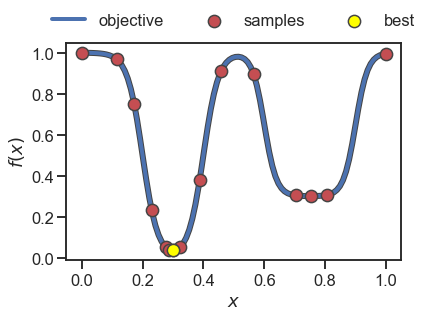

In [7]:
# objective function
x = np.linspace(0, 1, 100)
y = [objective(xi) for xi in x]

# observed parameters and objectives
samples_x = [obs['x'] for obs in observations]
samples_y = [obs['obj'] for obs in observations]

_ = plt.plot(x, y, linewidth=6, color='#444444')
_ = plt.plot(x, y, linewidth=4, label='objective')

_ = plt.scatter(samples_x, samples_y, zorder=10, s=150, color='r', edgecolor='#444444', label='samples')

# highlight best
_ = plt.scatter(samples_x[np.argmin(samples_y)], np.min(samples_y), zorder=11, s=150, 
                color='yellow', edgecolor='#444444', label='best')

# labels
_ = plt.xlabel('$x$')
_ = plt.ylabel('$f(x)$')
_ = plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5 ,1.), frameon=False)